In [45]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.metrics import classification_report
import os
import shutil
import string
import re
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

CPU times: user 57 µs, sys: 13 µs, total: 70 µs
Wall time: 73.2 µs


In [46]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

In [47]:
dataset=tf.keras.utils.get_file('aclImdb_v1',
                                url,
                                untar=True,
                                cache_dir=".",
                                cache_subdir='')

In [48]:
dataset_dir=os.path.join(os.path.dirname(dataset),'aclImdb')

In [49]:
os.listdir(dataset_dir)

['test', 'README', 'imdbEr.txt', 'train', 'imdb.vocab']

In [50]:
train_dir=os.path.join(dataset_dir,'train')

In [51]:
os.listdir(train_dir)

['neg',
 'urls_pos.txt',
 'unsupBow.feat',
 'pos',
 'urls_unsup.txt',
 'urls_neg.txt',
 'labeledBow.feat',
 'unsup']

In [52]:
sample_file_1=os.path.join(train_dir,'pos')

In [53]:
os.listdir(sample_file_1)

['1174_10.txt',
 '2716_10.txt',
 '9066_8.txt',
 '8_7.txt',
 '6020_7.txt',
 '11306_8.txt',
 '7007_8.txt',
 '40_8.txt',
 '13_7.txt',
 '9952_8.txt',
 '12149_10.txt',
 '8939_9.txt',
 '8632_9.txt',
 '6698_10.txt',
 '2794_8.txt',
 '5268_10.txt',
 '4571_9.txt',
 '6903_9.txt',
 '10339_7.txt',
 '10568_10.txt',
 '8328_10.txt',
 '1210_8.txt',
 '11379_7.txt',
 '4833_10.txt',
 '4396_10.txt',
 '4723_8.txt',
 '2751_10.txt',
 '12449_8.txt',
 '2946_10.txt',
 '11183_7.txt',
 '11920_9.txt',
 '2755_10.txt',
 '5514_9.txt',
 '1543_8.txt',
 '5184_9.txt',
 '1155_10.txt',
 '10497_8.txt',
 '1475_8.txt',
 '10734_10.txt',
 '7750_8.txt',
 '995_9.txt',
 '2644_8.txt',
 '4115_8.txt',
 '8496_7.txt',
 '9380_9.txt',
 '4232_7.txt',
 '2518_10.txt',
 '12140_8.txt',
 '9849_9.txt',
 '5578_10.txt',
 '6371_9.txt',
 '1947_8.txt',
 '1935_10.txt',
 '9949_9.txt',
 '5823_10.txt',
 '97_9.txt',
 '11427_10.txt',
 '4103_7.txt',
 '2075_8.txt',
 '3468_10.txt',
 '12178_7.txt',
 '3285_10.txt',
 '184_8.txt',
 '8093_7.txt',
 '3497_10.txt',
 

In [54]:
len(os.listdir(sample_file_1))

12500

In [55]:
sample_file=os.path.join(train_dir,'pos/1181_9.txt')

In [56]:
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [57]:

os.listdir(train_dir)

['neg',
 'urls_pos.txt',
 'unsupBow.feat',
 'pos',
 'urls_unsup.txt',
 'urls_neg.txt',
 'labeledBow.feat',
 'unsup']

In [58]:
remove_dir=os.path.join(train_dir,'unsup')
shutil.rmtree(remove_dir)

In [59]:
# os.listdir(remove_dir),#it doesn't exist we had deleted it in before code

In [60]:
batch_size=32
seed=42

In [61]:
raw_train_ds=tf.keras.preprocessing.text_dataset_from_directory('aclImdb/train',
                                                                batch_size=32,
                                                                validation_split=0.2,
                                                                subset='training',
                                                                seed=42)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [62]:
for text_batch,label_batch in raw_train_ds.take(1):
  for i in range(3):
    print('review',text_batch.numpy()[i])
    print('label',label_batch.numpy()[i])

review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
label 0
review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [63]:
raw_val_ds=tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    seed=seed,
    validation_split=0.2,
    subset='validation')

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [64]:
raw_test_ds=tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train',
    seed=seed,
    batch_size=batch_size)


Found 25000 files belonging to 2 classes.


In [65]:
def custom_standardization(input_data):
  lowercase=tf.strings.lower(input_data)
  stripped_html=tf.strings.regex_replace(lowercase,'<br />',' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]'% re.escape(string.punctuation),'')

In [66]:
max_features=10000
sequence_length=250

vectorize_layer=TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [67]:
train_text=raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [68]:
def vectorize_text(text,label):
  text=tf.expand_dims(text,-1)
  return vectorize_layer(text),label

In [69]:
text_batch,label_batch=next(iter(raw_train_ds))
first_review,first_label= text_batch[0],label_batch[0]
print('review',first_review)
print('label',raw_train_ds.class_names[first_label])
print('vectorized review',vectorize_text(first_review,first_label))

review tf.Tensor(b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.', shape=(), dtype=string)
label neg
vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  86,   17,  260,    2,  222,    1,  571,   31,  229,   11, 2418,
           1,   51,   22,   25,  404,  251,   12,  306,  282,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       

In [70]:
print('1287---->',vectorize_layer.get_vocabulary()[1287])
print('313----->',vectorize_layer.get_vocabulary()[313])
print('vocabukary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287----> silent
313-----> night
vocabukary size: 10000


In [71]:
train_ds=raw_train_ds.map(vectorize_text)
val_ds=raw_val_ds.map(vectorize_text)
test_ds=raw_test_ds.map(vectorize_text)

In [72]:
AUTOTUNE=tf.data.AUTOTUNE

train_ds=train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds=test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [73]:
embedding_dim=16

In [74]:
model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(max_features+1,embedding_dim),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.GlobalAveragePooling1D(),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Dense(1)])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [76]:
epochs=10
history=model.fit(train_ds,
                  validation_data=val_ds,
                  epochs=epochs)

Epoch 1/10
625/625 [==============================] - 11s 17ms/step - loss: 0.6632 - binary_accuracy: 0.6959 - val_loss: 0.6137 - val_binary_accuracy: 0.7702
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 0.5476 - binary_accuracy: 0.8013 - val_loss: 0.4975 - val_binary_accuracy: 0.8212
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4438 - binary_accuracy: 0.8454 - val_loss: 0.4193 - val_binary_accuracy: 0.8482
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3774 - binary_accuracy: 0.8656 - val_loss: 0.3734 - val_binary_accuracy: 0.8604
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3347 - binary_accuracy: 0.8788 - val_loss: 0.3451 - val_binary_accuracy: 0.8668
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3041 - binary_accuracy: 0.8882 - val_loss: 0.3259 - val_binary_accuracy: 0.8704
Epoch 7/10
625/625 [==============================] - 4s 7ms/s

In [77]:
from tensorflow.keras.utils import plot_model

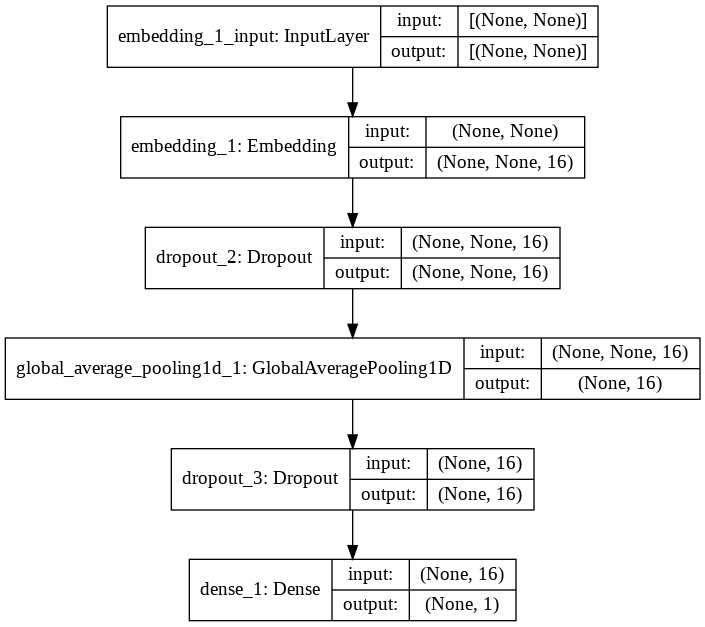

In [78]:
plot_model(model,show_shapes=True)

<Figure size 720x720 with 0 Axes>

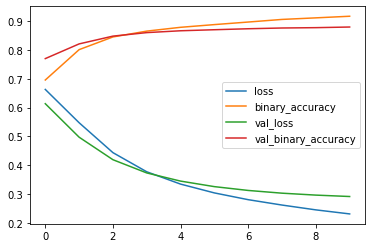

In [79]:
plt.figure(figsize=(10,10))
pd.DataFrame(history.history).plot()

In [80]:
loss,accuracy=model.evaluate(test_ds)
print('loss',loss)
print('accuracy',accuracy)

782/782 [==============================] - 8s 10ms/step - loss: 0.2308 - binary_accuracy: 0.9146
loss 0.23078015446662903
accuracy 0.9146400094032288


In [81]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'loweer right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


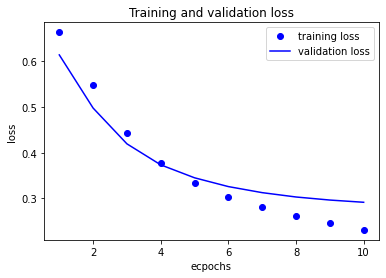

In [82]:
acc=history_dict['binary_accuracy']
val_acc=history_dict['val_binary_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('ecpochs')
plt.ylabel('loss')
plt.legend(loc='loweer right')
plt.show()

In [83]:
len(acc)

10

In [84]:
list(range(1,len(acc)))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

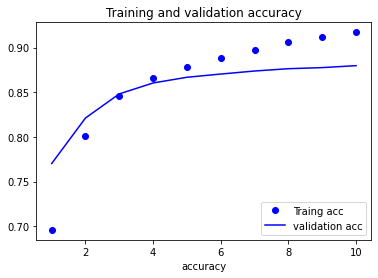

In [85]:
plt.plot(epochs,acc,'bo',label='Traing acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.xlabel('accuracy')
plt.legend(loc='lower right')
plt.show()

In [86]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  tf.keras.layers.Activation('sigmoid')
])

export_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

782/782 [==============================] - 8s 10ms/step - loss: 0.2308 - accuracy: 0.9146
0.9146400094032288


In [87]:
examples = [
  "The movie was great!",
  "The movie was okay.",
  "The movie was terrible..."
]

export_model.predict(examples)

array([[0.62416804],
       [0.44719586],
       [0.36272156]], dtype=float32)